In [43]:
%%html
<style>
    body {
        font-family: "Times New Roman", Times, serif; 
    }
</style>

## Q1

In [44]:
import nltk
from nltk.corpus import gutenberg, stopwords
import re
import pandas as pd
import numpy as np

# Download necessary NLTK data
nltk.download('gutenberg')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\lyj12\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lyj12\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lyj12\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
stop_words = stopwords.words('english') 
sentences = gutenberg.sents('carroll-alice.txt') 

termlist = [] 
for terms in sentences: 
    terms = [w for w in terms if w not in stop_words] 
    terms = [w for w in terms if re.search(r'^[a-zA-Z]{2}', w) is not None]
    terms = [w for w in terms if re.search(r'said', w) is None] #remove 'said' since it is not important
    terms = [w for w in terms if re.search(r'CHAPTER', w) is None]
    # In lower case
    terms = [w.lower() for w in terms]
    if len(terms)>0:
        termlist.append(terms)

display(termlist)

[['alice', 'adventures', 'wonderland', 'lewis', 'carroll'],
 ['down', 'rabbit', 'hole'],
 ['alice',
  'beginning',
  'get',
  'tired',
  'sitting',
  'sister',
  'bank',
  'nothing',
  'twice',
  'peeped',
  'book',
  'sister',
  'reading',
  'pictures',
  'conversations',
  'use',
  'book',
  'thought',
  'alice',
  'without',
  'pictures',
  'conversation'],
 ['so',
  'considering',
  'mind',
  'well',
  'could',
  'hot',
  'day',
  'made',
  'feel',
  'sleepy',
  'stupid',
  'whether',
  'pleasure',
  'making',
  'daisy',
  'chain',
  'would',
  'worth',
  'trouble',
  'getting',
  'picking',
  'daisies',
  'suddenly',
  'white',
  'rabbit',
  'pink',
  'eyes',
  'ran',
  'close'],
 ['there',
  'nothing',
  'very',
  'remarkable',
  'alice',
  'think',
  'very',
  'much',
  'way',
  'hear',
  'rabbit',
  'say',
  'oh',
  'dear'],
 ['oh', 'dear'],
 ['shall', 'late'],
 ['thought',
  'afterwards',
  'occurred',
  'ought',
  'wondered',
  'time',
  'seemed',
  'quite',
  'natural',
  'r

In [46]:
df = pd.DataFrame(termlist)
df.to_csv('alice.csv', index=False, header=False)
df

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,alice,adventures,wonderland,lewis,carroll,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,down,rabbit,hole,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,alice,beginning,get,tired,sitting,sister,bank,nothing,twice,peeped,...,None,None,None,None,None,None,None,None,None,None
3,so,considering,mind,well,could,hot,day,made,feel,sleepy,...,None,None,None,None,None,None,None,None,None,None
4,there,nothing,very,remarkable,alice,think,very,much,way,hear,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1682,but,sister,sat,still,left,leaning,head,hand,watching,setting,...,None,None,None,None,None,None,None,None,None,None
1683,first,dreamed,little,alice,tiny,hands,clasped,upon,knee,bright,...,None,None,None,None,None,None,None,None,None,None
1684,the,long,grass,rustled,feet,white,rabbit,hurried,frightened,mouse,...,None,None,None,None,None,None,None,None,None,None
1685,so,sat,closed,eyes,half,believed,wonderland,though,knew,open,...,None,None,None,None,None,None,None,None,None,None


In [47]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_ary = te.fit(termlist).transform(termlist)
df_te = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df_te, min_support=0.005, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display the rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

    antecedents consequents   support  confidence      lift
0      (afraid)     (alice)  0.005928    0.833333  3.613967
1       (alice)    (afraid)  0.005928    0.025707  3.613967
2     (another)     (alice)  0.006520    0.500000  2.168380
3       (alice)   (another)  0.006520    0.028278  2.168380
4        (back)     (alice)  0.009484    0.421053  1.826005
..          ...         ...       ...         ...       ...
249      (went)       (the)  0.006520    0.134146  2.002698
250   (thought)     (would)  0.005335    0.121622  2.931081
251     (would)   (thought)  0.005335    0.128571  2.931081
252      (went)      (time)  0.005335    0.109756  2.763560
253      (time)      (went)  0.005335    0.134328  2.763560

[254 rows x 5 columns]


Display the patterns

Choose the rules with confidence larger than 0.8

Extract and print interesting patterns

In [48]:
interesting_rules = rules[(rules['confidence'] > 0.7)]
interesting_rules = interesting_rules.sort_values(by='confidence', ascending=False)
print(interesting_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

     antecedents consequents   support  confidence        lift
163       (join)     (dance)  0.005335    1.000000  129.769231
183       (hare)     (march)  0.017783    1.000000   54.419355
233       (mock)    (turtle)  0.033195    1.000000   29.086207
182      (march)      (hare)  0.017783    0.967742   54.419355
232     (turtle)      (mock)  0.033195    0.965517   29.086207
179      (glass)    (little)  0.005335    0.900000   13.088793
0       (afraid)     (alice)  0.005928    0.833333    3.613967
245      (white)    (rabbit)  0.014226    0.827586   29.705062
143  (beautiful)      (soup)  0.005335    0.818182   86.267045
118    (thought)     (alice)  0.034381    0.783784    3.399083
99         (saw)     (alice)  0.005928    0.714286    3.097686
161         (of)    (course)  0.005928    0.714286   50.208333


In [49]:
patterns = []
for index, row in interesting_rules.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequent = list(row['consequents'])[0]
    pattern = f"{antecedent} {consequent}"
    patterns.append(pattern.title()) 

patterns

['Join Dance',
 'Hare March',
 'Mock Turtle',
 'March Hare',
 'Turtle Mock',
 'Glass Little',
 'Afraid Alice',
 'White Rabbit',
 'Beautiful Soup',
 'Thought Alice',
 'Saw Alice',
 'Of Course']

Therefore, the patterns include "Mock Turtle", "White Rabbit", "Hare March", "Beautiful soup" and so on. In addition, there may be close connections between "Glass" and "Little", "Alice" and "Thought", and "Alice" and "Afraid" in the sentence.

## Q2

In [50]:
def load_mnist(path, kind='train'):
    from numpy import fromfile, uint8
    import os
    import struct
    
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = fromfile(lbpath, dtype=uint8)
        with open(images_path, 'rb') as imgpath:
            magic, num, rows, cols = struct.unpack(">IIII",imgpath.read(16))
            images = fromfile(imgpath, dtype=uint8).reshape(len(labels), 784)
            images = ((images / 255.) - .5) * 2
    return images, labels

X_train_mnist, y_train_mnist = load_mnist('mnist/', kind='train')
print(f'Rows= {X_train_mnist.shape[0]}, columns= {X_train_mnist.shape[1]}')

X_test_mnist, y_test_mnist = load_mnist('mnist/', kind='t10k')
print(f'Rows= {X_test_mnist.shape[0]}, columns= {X_test_mnist.shape[1]}')

Rows= 60000, columns= 784
Rows= 10000, columns= 784


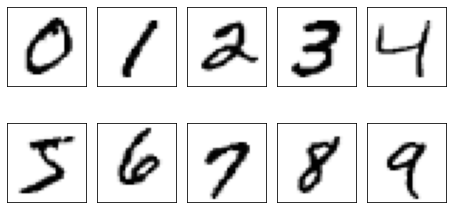

In [51]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neural_network import MLPClassifier


_, ax = plt.subplots(nrows=2, ncols=5, sharex='all', sharey='all', dpi=72)
ax = ax.flatten()
for img_i in range(10):
    img = X_train_mnist[y_train_mnist == img_i][0].reshape(28, 28)
    ax[img_i].imshow(img, cmap='Greys')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
plt.show()

In [52]:
from sklearn.metrics import confusion_matrix

def get_acc(_y_test, _y_pred):
    return (np.sum(_y_test == _y_pred)).astype(float) / _y_test.shape[0]

2 hidden layers

In [54]:
class NeuralNetMLP(object):

    def __init__(self, n_hidden1=30, n_hidden2=15, epochs=100, eta=0.001, minibatch_size=1, seed=None):
        self.random = np.random.RandomState(seed)  # used to randomize weights
        self.n_hidden1 = n_hidden1
        self.n_hidden2 = n_hidden2
        self.epochs = epochs  # number of iterations
        self.eta = eta  # learning rate
        self.minibatch_size = minibatch_size  # size of training batch - 1 would not work
        self.w_out, self.w_h = None, None
    
    @staticmethod
    def onehot(_y, _n_classes):  # one hot encode the input class y
        onehot = np.zeros((_n_classes, _y.shape[0]))
        for idx, val in enumerate(_y.astype(int)):
            onehot[val, idx] = 1.0
        return onehot.T
    
    @staticmethod
    def sigmoid(_z):  # Eq 1
        return 1.0 / (1.0 + np.exp(-np.clip(_z, -250, 250)))
    
    def _initialize_weights(self, n_features, n_output):
        self.b1 = np.zeros(self.n_hidden1)
        self.w_h1 = self.random.normal(loc=0.0, scale=0.1, size=(n_features, self.n_hidden1))

        self.b2 = np.zeros(self.n_hidden2)
        self.w_h2 = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden1, self.n_hidden2))

        self.b3 = np.zeros(n_output)
        self.w_out = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden2, n_output))
    
    def _forward(self, _X):  # Eq 2
        z_h1 = np.dot(_X, self.w_h1) + self.b1
        a_h1 = self.sigmoid(z_h1)
        z_h2 = np.dot(a_h1, self.w_h2) + self.b2
        a_h2 = self.sigmoid(z_h2)
        z_out = np.dot(a_h2, self.w_out) + self.b3
        a_out = self.sigmoid(z_out)
        return z_h1, a_h1, z_h2, a_h2, z_out, a_out

    def compute_cost(self, y_enc, output):  # Eq 4
        term1 = -y_enc * (np.log(output))
        term2 = (1.0 - y_enc) * np.log(1.0 - output)
        cost = np.sum(term1 - term2)
        return cost

    def predict(self, _X):
        z_h1, a_h1, z_h2, a_h2, z_out, a_out = self._forward(_X)
        ypred = np.argmax(z_out, axis=1)
        return ypred
    
    def fit(self, _X_train, _y_train, _X_valid, _y_valid):
        import sys
        n_output = np.unique(_y_train).shape[0]  # number of class labels
        n_features = _X_train.shape[1]
        self._initialize_weights(n_features, n_output)
        y_train_enc = self.onehot(_y_train, n_output)  # one-hot encode original y
        for ei in range(self.epochs):  # Ideally must shuffle at every epoch
            indices = np.arange(_X_train.shape[0])
            if self.minibatch_size > 1:
                self.random.shuffle(indices)
            for start_idx in range(0, indices.shape[0] - self.minibatch_size + 1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]
                
                z_h1, a_h1, z_h2, a_h2, z_out, a_out = self._forward(_X_train[batch_idx])  # neural network model
                
                sigmoid_derivative_h2 = a_h2 * (1.0 - a_h2)  # Eq 3
                sigmoid_derivative_h1 = a_h1 * (1.0 - a_h1)  # Eq 3
                delta_out = a_out - y_train_enc[batch_idx]  # Eq 5
                delta_h2 = (np.dot(delta_out, self.w_out.T) * sigmoid_derivative_h2)  # Eq 6
                delta_h1 = (np.dot(delta_h2, self.w_h2.T) * sigmoid_derivative_h1)  # Eq 6
                grad_w_out = np.dot(a_h2.T, delta_out)  # Eq 7
                grad_w_h2 = np.dot(a_h1.T, delta_h2)  # Eq 7
                grad_w_h1 = np.dot(_X_train[batch_idx].T, delta_h1)  # Eq 8
                
                self.w_out -= self.eta * grad_w_out  # Eq 9
                self.b3 -= self.eta * np.sum(delta_out, axis=0)

                self.w_h2 -= self.eta * grad_w_h2  # Eq 9
                self.b2 -= self.eta * np.sum(delta_h2, axis=0)

                self.w_h1 -= self.eta * grad_w_h1  # Eq 9
                self.b1 -= self.eta * np.sum(delta_h1, axis=0)

            # Evaluation after each epoch during training
            z_h1, a_h1, z_h2, a_h2, z_out, a_out = self._forward(_X_train)
            cost = self.compute_cost(y_enc=y_train_enc, output=a_out)
            y_train_pred = self.predict(_X_train)  # monitoring training progress through reclassification
            y_valid_pred = self.predict(_X_valid)  # monitoring training progress through validation
            train_acc = ((np.sum(_y_train == y_train_pred)).astype(float) / _X_train.shape[0])
            valid_acc = ((np.sum(_y_valid == y_valid_pred)).astype(float) / _X_valid.shape[0])
            print(f'\r{ei+1}/{self.epochs} | Cost: {cost:.2f} | Train/Valid Acc.: {train_acc*100:.2f}%/{valid_acc*100:.2f}%', end='')
        
        print()
        return self

In [55]:
nn = NeuralNetMLP(n_hidden1=20, n_hidden2=10, epochs=50, eta=0.001, minibatch_size=32, seed=42)

nn.fit(X_train_mnist[:55000], y_train_mnist[:55000], X_train_mnist[55000:], y_train_mnist[55000:])

50/50 | Cost: 15281.02 | Train/Valid Acc.: 95.94%/95.56%


In [56]:
nn = NeuralNetMLP(n_hidden1=256, n_hidden2=256, epochs=50, eta=0.001, minibatch_size=32, seed=42)

nn.fit(X_train_mnist[:55000], y_train_mnist[:55000], X_train_mnist[55000:], y_train_mnist[55000:])

50/50 | Cost: 2747.45 | Train/Valid Acc.: 99.66%/98.44%%


In [59]:
y_pred = nn.predict(X_test_mnist)

print(f'Accuracy= {get_acc(y_test_mnist, y_pred)*100:.2f}%')
print(confusion_matrix(y_test_mnist, y_pred))

Accuracy= 97.92%
[[ 971    0    2    0    0    1    2    1    2    1]
 [   0 1125    4    1    0    1    1    1    2    0]
 [   3    0 1014    3    3    0    0    5    4    0]
 [   1    0    5  987    0    5    0    3    3    6]
 [   1    0    4    0  959    0    4    2    1   11]
 [   4    0    1    7    1  870    5    1    2    1]
 [   6    3    1    1    3    4  935    0    5    0]
 [   1    5   12    5    0    0    0  997    1    7]
 [   4    0    6    5    3    1    2    4  945    4]
 [   3    2    0    4    5    2    1    2    1  989]]
